In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
suicides = pd.read_csv("us_suicides_merged.csv")
suicides.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,depression_percentage,drug_death_rate
0,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,4346734000000,19693,Generation X,NaN,NaN
1,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X,NaN,NaN
2,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,4346734000000,19693,Boomers,NaN,NaN
3,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers,NaN,NaN
4,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,4346734000000,19693,Silent,NaN,NaN


In [13]:
drug_agg = pd.read_csv("intermediate_data/drug_aggregate.csv")
drug_agg = drug_agg[['year', 'drug_death_rate']]
drug_agg['year'] = drug_agg.year.astype(int)
drug_agg['drug_death_rate'] = drug_agg.drug_death_rate.astype(float)
drug_agg.head()

,year,drug_death_rate
0,1950,2.5
1,1960,1.7
2,1970,2.8
3,1980,1.9
4,1990,2.3


In [32]:
non_na_depression = suicides[suicides['depression_percentage'].notnull()][["year", "age", "sex", "depression_percentage"]]
non_na_depression.head()

,year,age,sex,depression_percentage
60,1990,15-24 years,female,5.75
61,1990,15-24 years,male,3.53
62,1990,25-34 years,female,5.75
63,1990,25-34 years,male,3.53
64,1990,35-54 years,female,5.75


FOR MALES


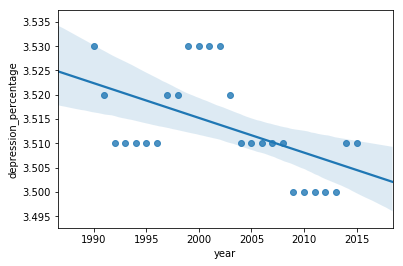

FOR FEMALES


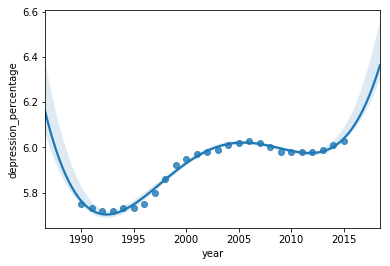

In [55]:
#depression is by gender
temp = non_na_depression[non_na_depression['age'] == '15-24 years']
for gender in ["male", "female"]:
    temp2 = temp[temp["sex"] == gender]
    print("FOR " + gender.upper() + "S")
    if gender == 'male':
        sns.regplot(x="year", y="depression_percentage", data=temp2, order=1)
    else:
        sns.regplot(x="year", y="depression_percentage", data=temp2, order=4)
    plt.show()

In [34]:
non_na_drugs = suicides[suicides['drug_death_rate'].notnull()][["year", "age", "sex", "drug_death_rate"]]
non_na_drugs.head()

,year,age,sex,drug_death_rate
168,1999,15-24 years,female,1.8
169,1999,15-24 years,male,4.5
170,1999,25-34 years,female,4.6
171,1999,25-34 years,male,11.5
172,1999,35-54 years,female,15.9


For age group: 15-24 years


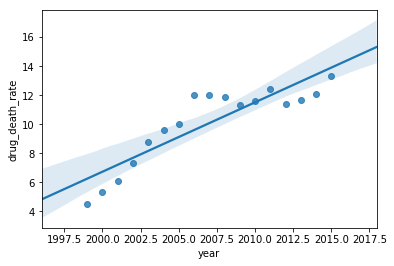

For age group: 25-34 years


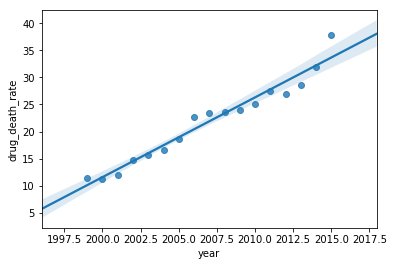

For age group: 35-54 years


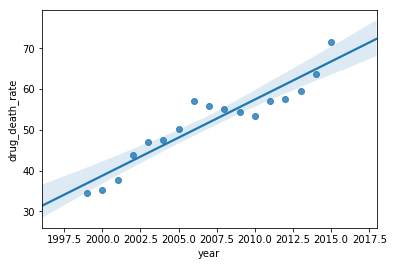

For age group: 5-14 years


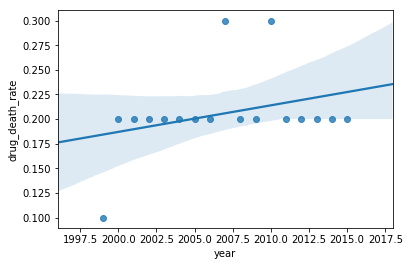

For age group: 55-74 years


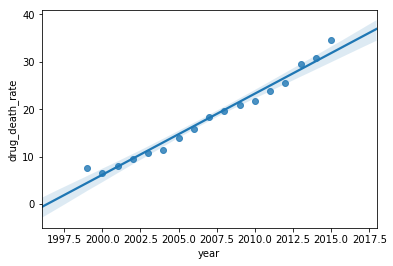

For age group: 75+ years


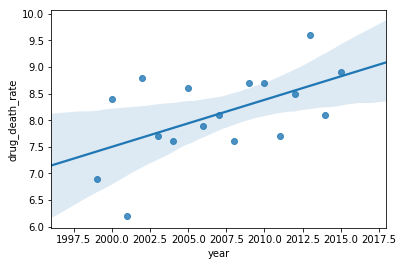

In [40]:
#drugs is by age group
temp = non_na_drugs[non_na_drugs['sex'] == 'male']
for i in non_na_drugs.age.unique():
    temp2 = temp[temp["age"] == i]
    print("For age group: " + i)
    sns.regplot(x="year", y="drug_death_rate", data=temp2)
    plt.show()